# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [1]:
%matplotlib notebook

import logging
import calendar
import numpy as np
from datetime import timedelta
from matplotlib import pyplot as plt
from helper import *
from austria import Austria
from ecdc import ECDC
ecdc = ECDC()
AT = Austria()
logging.basicConfig(level=logging.INFO)
plt.style.use('seaborn-darkgrid')

# df_ecdc = ecdc()
# logging.info('ECDC: \n%s', df_ecdc.columns)



## Cases

<IPython.core.display.Javascript object>


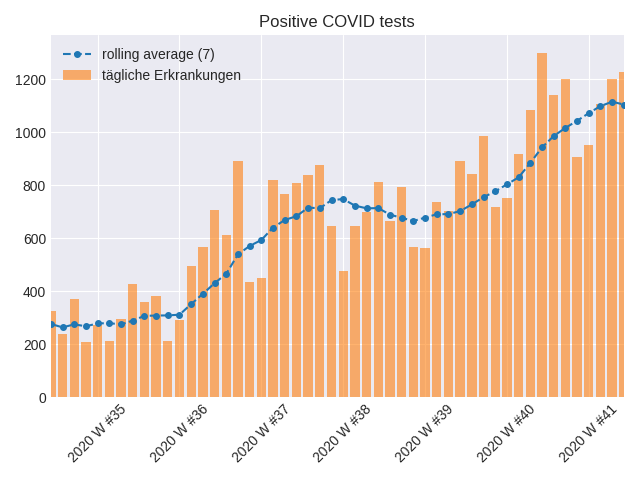

[Timestamp('2020-08-26 00:00:00'), Timestamp('2020-10-14 00:00:00')]


In [2]:
ax = AT.plot_tägliche_erkrankungen(roll_days=7,ndays=50)


In [3]:
import pandas as pd
pd.arrays.DatetimeArray(AT.epicurve.time)

<DatetimeArray>
['2020-02-25 00:00:00', '2020-02-26 00:00:00', '2020-02-27 00:00:00',
 '2020-02-28 00:00:00', '2020-02-29 00:00:00', '2020-03-01 00:00:00',
 '2020-03-02 00:00:00', '2020-03-03 00:00:00', '2020-03-04 00:00:00',
 '2020-03-05 00:00:00',
 ...
 '2020-10-05 00:00:00', '2020-10-06 00:00:00', '2020-10-07 00:00:00',
 '2020-10-08 00:00:00', '2020-10-09 00:00:00', '2020-10-10 00:00:00',
 '2020-10-11 00:00:00', '2020-10-12 00:00:00', '2020-10-13 00:00:00',
 '2020-10-14 00:00:00']
Length: 233, dtype: datetime64[ns]

## Weekday Bias

<IPython.core.display.Javascript object>


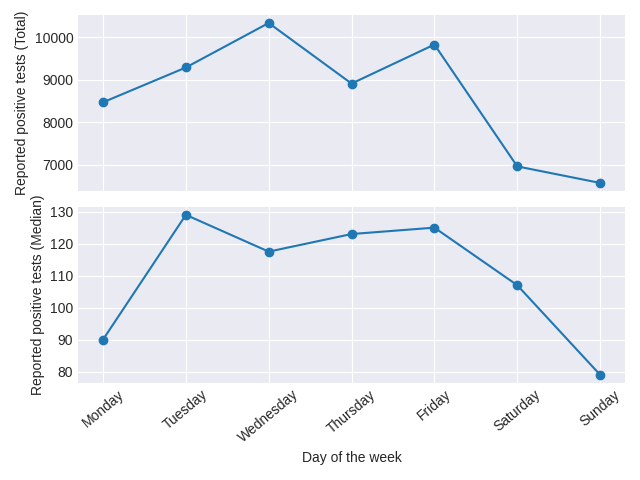

In [4]:
f, ax = plt.subplots(nrows=2, sharex=True)
AT.epicurve.groupby(['weekday']).sum()['tägliche Erkrankungen'].plot(ax=ax[0], marker='o')
ax[0].set_ylabel('Reported positive tests (Total)')
AT.epicurve.groupby(['weekday']).median()['tägliche Erkrankungen'].plot(ax=ax[1], marker='o')
ax[1].set_ylabel('Reported positive tests (Median)')
ax[1].set_xlabel('Day of the week')
ax[1].set_xticks([0,1,2,3,4,5,6])
ax[1].set_xticklabels(WEEKDAYS, rotation=40)
plt.tight_layout()

## Comparison with ECDC data

### Number of cases

In [20]:
AT.epicurve['tägliche Erkrankungen'].sum(), ecdc.select_country('AT').cases.sum()


(60376, 60764)

### Plots overlaid

<IPython.core.display.Javascript object>


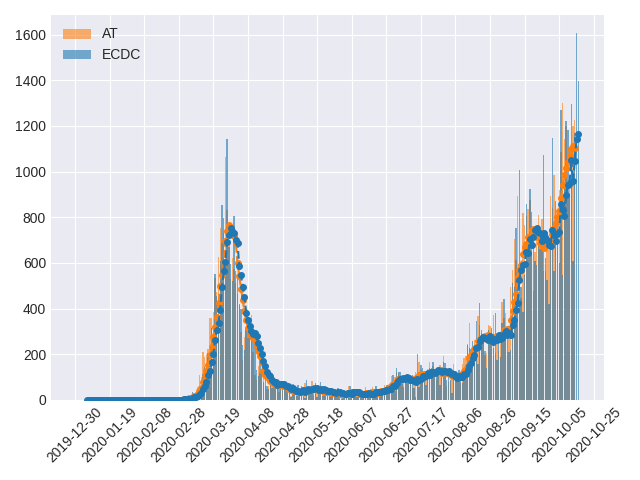

In [21]:
f,ax = plt.subplots()
# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax.plot(AT.epicurve.time, AT.epicurve['tägliche Erkrankungen'].rolling(7).mean(),  marker='o', markersize=4, linestyle='--', color='C1')

ax.bar(AT.epicurve.time, AT.epicurve['tägliche Erkrankungen'],label='AT',  alpha=0.6, color='C1')
selection =  ecdc.select_country('AT').sort_values(by=['year','month','day'], ascending=True)
ax.bar(selection.dateRep, selection['cases'],label='ECDC',  alpha=0.6, color='C0')
ax.plot(selection.dateRep, selection['cases'].rolling(7).mean(), marker='o', markersize=4, linestyle='--',color='C0')
# plt.yscale('log')

ax.xaxis.set_major_locator(plt.MaxNLocator(20));

plt.xticks(rotation=45);
plt.legend(loc='best')
plt.tight_layout()



### Last 5 days

In [22]:
 ecdc.select_country('AT').sort_values('dateRep')[['dateRep', 'cases', 'deaths','popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' ]].tail(6)

,dateRep,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2640,2020-10-11,901,1,8858775.0,132.580408
2639,2020-10-12,1298,6,8858775.0,141.294931
2638,2020-10-13,608,5,8858775.0,143.428409
2637,2020-10-14,1171,10,8858775.0,148.496829
2636,2020-10-15,1606,9,8858775.0,153.689421
2635,2020-10-16,1396,6,8858775.0,163.081239


In [23]:
AT.epicurve.sort_values('time').tail(5)

,time,tägliche Erkrankungen,Timestamp,weekday
228,2020-10-10,905,2020-10-15T14:02:01,5
229,2020-10-11,952,2020-10-15T14:02:01,6
230,2020-10-12,1105,2020-10-15T14:02:01,0
231,2020-10-13,1199,2020-10-15T14:02:01,1
232,2020-10-14,1226,2020-10-15T14:02:01,2


In [24]:
AT.epicurve.time.max()

Timestamp('2020-10-14 00:00:00')

In [25]:
AT.epicurve.agg(
        {'tägliche Erkrankungen': ['sum', last_7_days_sum,  rolling_avg, latest,  'max' ],
        'time': ['min', 'max']} )


,tägliche Erkrankungen,time
last_7_days_sum,7727.000000,NaT
latest,1226.000000,NaT
max,1300.000000,2020-10-14
min,NaN,2020-02-25
rolling_avg,1103.857143,NaT
sum,60376.000000,NaT


In [26]:
ecdc.compact_overview(ecdc.select_country('AT'))

cases              deaths                  \
                         rolling_avg latest   max    sum last_7_days_sum   
countriesAndTerritories                                                    
Austria                  1165.857143   1396  1606    894              41   

                                                
                        rolling_avg latest max  
countriesAndTerritories                         
Austria                    5.857143      6  31

## Number of Tests and Positives

In [27]:
case_numbers = AT.fall_zählen
case_timeline = AT.fälle_timeline_gkz

### Vienna

In [28]:
wien_cases = case_numbers[case_numbers.Bundesland=='Wien']
wien_timeline = case_timeline[case_timeline.Bezirk=='Wien']


In [29]:
wien_cases.iloc[0].MeldeDatum

Timestamp('2020-04-01 00:00:00')

<IPython.core.display.Javascript object>


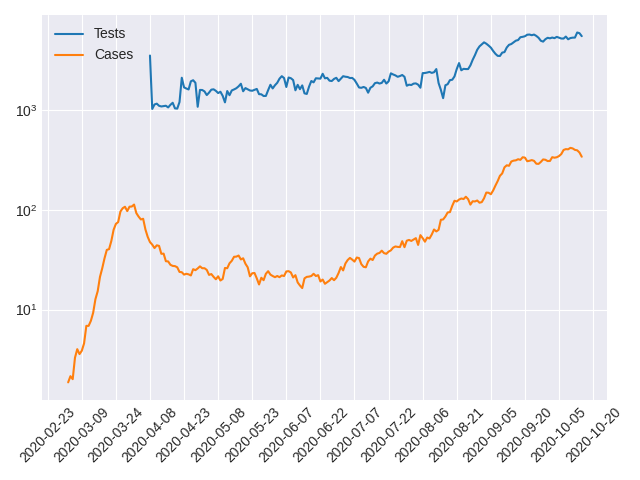

In [30]:
f, ax = plt.subplots()
ax.plot(wien_cases.MeldeDatum, wien_cases.TestGesamt.diff().rolling(7).mean(), label='Tests')
ax.plot(wien_timeline.Time, wien_timeline.AnzahlFaelle.rolling(7).mean(), label='Cases')
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.legend(loc='best')
plt.yscale('log')

plt.xticks(rotation=45);
plt.tight_layout()

<IPython.core.display.Javascript object>


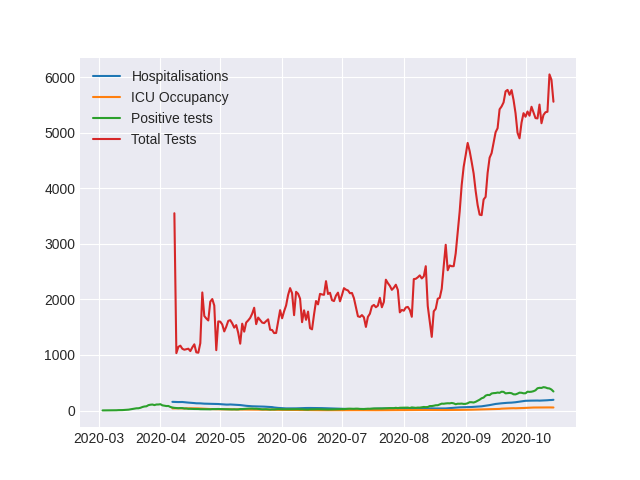

In [31]:
f, ax = plt.subplots()
ax.plot(wien_cases.MeldeDatum, wien_cases.FZHosp.rolling(7).mean(), label='Hospitalisations')
ax.plot(wien_cases.MeldeDatum, wien_cases.FZICU.rolling(7).mean(), label='ICU Occupancy')
ax.plot(wien_timeline.Time, wien_timeline.AnzahlFaelle.rolling(7).mean(), label='Positive tests')
ax.plot(wien_cases.MeldeDatum, wien_cases.TestGesamt.diff().rolling(7).mean(), label='Total Tests')

# ax.plot(df_at.time, df_at['tägliche Erkrankungen'].rolling(7).mean(), label='Epicurve')
# plt.yscale('log')
plt.legend(loc='best')
#  Index(['Time', 'Bezirk', 'GKZ', 'AnzEinwohner', 'AnzahlFaelle',
#        'AnzahlFaelleSum', 'AnzahlFaelle7Tage', 'SiebenTageInzidenzFaelle',
#        'AnzahlTotTaeglich', 'AnzahlTotSum', 'AnzahlGeheiltTaeglich',
#        'AnzahlGeheiltSum'],

#  Index(['Meldedat', 'TestGesamt', 'MeldeDatum', 'FZHosp', 'FZICU', 'FZHospFree','FZICUFree', 'BundeslandID', 'Bundesland'],


In [33]:
AT.epicurve.columns

Index(['time', 'tägliche Erkrankungen', 'Timestamp', 'weekday'], dtype='object')

### Ratio of positives to tests

<IPython.core.display.Javascript object>


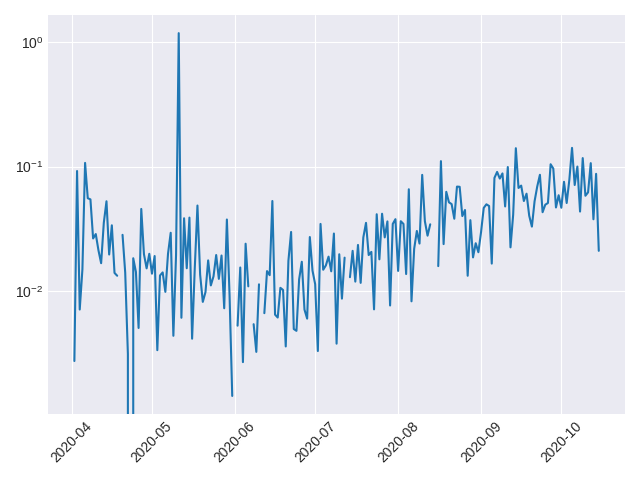

<ipython-input-40-7fe128ef3274>:6: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.array(wien_timeline[wien_timeline.Time.isin(wien_cases.MeldeDatum)].AnzahlFaelle)/np.array(wien_cases.TestGesamt.diff())


In [40]:
# ax.plot(wien_cases.MeldeDatum, wien_cases.FZHosp.rolling(7).mean(), label='Hospitalisations')
# ax.plot(wien_cases.MeldeDatum, wien_cases.FZICU.rolling(7).mean(), label='ICU Occupancy')
# ax.plot(wien_timeline.Time, wien_timeline.AnzahlFaelle.rolling(7).mean(), label='Positive tests')
# ax.plot(wien_cases.MeldeDatum, wien_cases.TestGesamt.diff().rolling(7).mean(), label='Total Tests')
f,ax=plt.subplots()
ratio = np.array(wien_timeline[wien_timeline.Time.isin(wien_cases.MeldeDatum)].AnzahlFaelle)/np.array(wien_cases.TestGesamt.diff())
ax.plot(wien_cases.MeldeDatum,ratio)
plt.yscale('log')

plt.xticks(rotation=45);
plt.tight_layout()

In [41]:
np.array(wien_cases.TestGesamt.diff())

array([   nan, 18880.,   738.,  1122.,  1404.,   654.,   861.,  1210.,
        1245.,  1530.,  1268.,  1013.,   536.,   930.,  1269.,   947.,
        1996.,  1653.,     0.,   494.,  2130.,  7661., -2021.,  1686.,
        1401.,  2366.,   831.,  1310.,  2033.,  1603.,  1663.,  1044.,
        1486.,  1421.,  2049.,  2125.,  1200.,  1121.,  1367.,   512.,
          51.,  4572.,  1117.,  2355.,  1386.,  1683.,  1042.,   801.,
        2502.,  1949.,  2032.,  1075.,  1617.,  1292.,  1025.,  1194.,
        1913.,  1644.,  1090.,  3016.,  2769.,     0.,  2079.,  2645.,
        2965.,  1954.,  2376.,     0.,  2942.,  1840.,  2025.,     0.,
        3450.,  1172.,  1041.,   850.,  1695.,  3902.,  1691.,  3029.,
        2497.,   967.,   803.,  3417.,  2287.,  1847.,  2089.,  2386.,
        1658.,  1176.,  2323.,  3073.,  2717.,  1904.,  2287.,  1303.,
        1214.,  1661.,  1929.,  1581.,  1819.,  2523.,  1022.,     0.,
        2933.,  2324.,  2512.,  1999.,  2228.,  1220.,   990.,  1743.,
      

## Corona Ampel

In [37]:
ampel = AT.ampel_aktuell

## ICU Beds

<IPython.core.display.Javascript object>


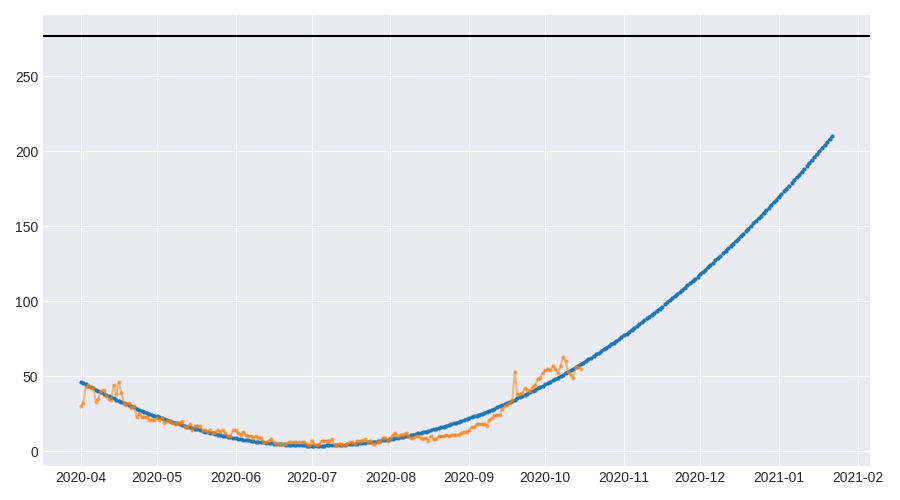

In [42]:
icu_occupancy = np.array(wien_cases.FZICU)
ndays = np.arange(len(icu_occupancy))
predict_days=100
future = np.arange(ndays[0],ndays[-1]+predict_days)
future_days = pd.date_range(start =wien_cases.iloc[0].MeldeDatum, end = wien_cases.iloc[-1].MeldeDatum + timedelta(days=predict_days-1)).to_list()

z = np.polyfit(ndays, icu_occupancy, 2)
p = np.poly1d(z)

f, ax = plt.subplots(figsize=(9,5))
ax.plot(future_days, p(future), marker='o', linestyle='--',markersize=2)
ax.plot(wien_cases.MeldeDatum, icu_occupancy, label='occupancy', marker='o', alpha=0.5,markersize=2)
ax.axhline(y=277,color='k')

plt.tight_layout()

In [43]:

# 


## Deaths

In [44]:
from gestorbene import Gestorbene
G = Gestorbene()


### Overall Deaths

<IPython.core.display.Javascript object>


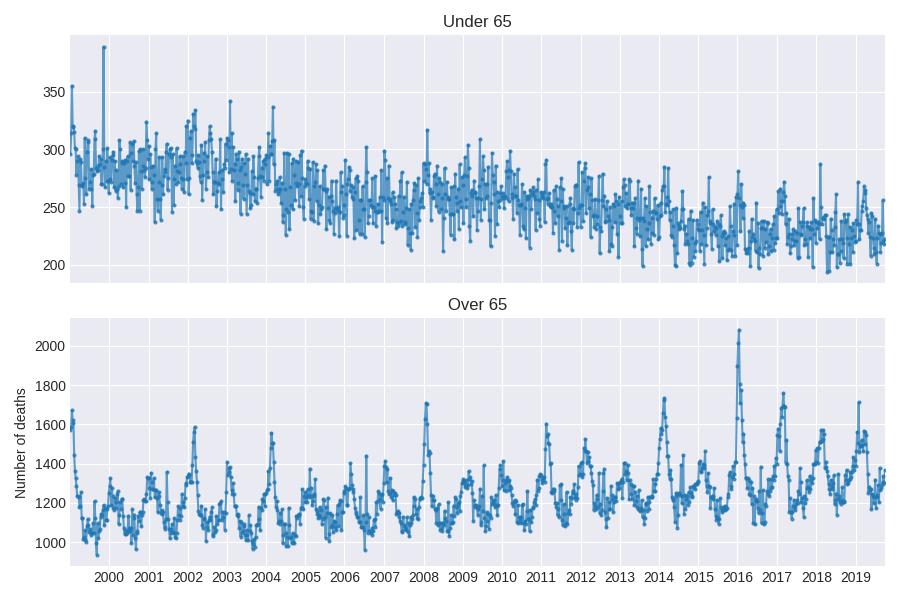

In [48]:
dates = pd.date_range(start=min(G.under_65.week_end), end = max(G.under_65.week_end),freq='Y',closed='left')
f, ax = plt.subplots(figsize=(9,6), sharex=True, nrows=2)
G.under_65.groupby(['week_end']).sum()['F-ANZ-1'].plot(ax=ax[0], alpha=0.7, marker='o', markersize=2, title='Under 65')
G.over_65.groupby(['week_end']).sum()['F-ANZ-1'].plot(ax=ax[1], alpha=0.7, marker='o', markersize=2, title='Over 65')
plt.xlabel('')
plt.ylabel('Number of deaths')
plt.xticks(dates, dates.strftime('%Y'))
plt.tight_layout()

### By Gender

<IPython.core.display.Javascript object>


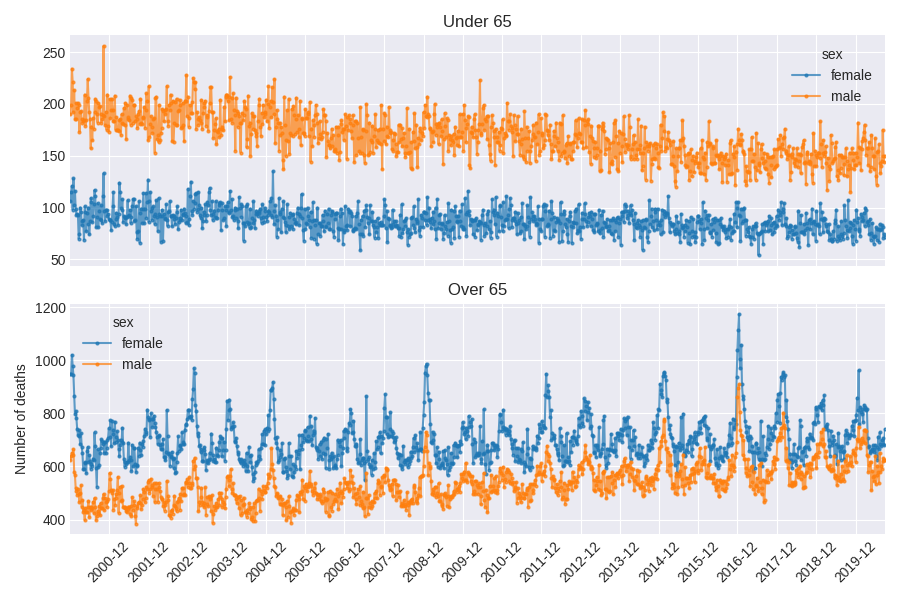

In [49]:
dates = pd.date_range(start=min(G.under_65.week_end), end = max(G.under_65.week_end),freq='Y',closed='left')
f, ax = plt.subplots(figsize=(9,6), sharex=True, nrows=2)
G.under_65.groupby(['week_end','sex']).sum()['F-ANZ-1'].unstack().plot(ax=ax[0], alpha=0.7, marker='o', markersize=2, title='Under 65')
G.over_65.groupby(['week_end','sex']).sum()['F-ANZ-1'].unstack().plot(ax=ax[1], alpha=0.7, marker='o', markersize=2, title='Over 65')
plt.xlabel('')
plt.xticks(rotation=45)

plt.ylabel('Number of deaths')
plt.xticks(dates, dates.strftime('%Y-%m'))
plt.tight_layout()

### Monthly